In [1]:
import copy

from utilities import energy_fun, update_energy, Flipper, metropolis_rule, ising_ferro
import numpy as np

import matplotlib.pyplot as plt

In [2]:
n_iters = 3*10 ** 5
q = 5
side = 20
N = side ** 2
energies = {}
magnetizations = {}
acceptance = {}
burnin = 5000

In [3]:
# ayo = []

In [4]:
def metropolis(T):
    flipper = Flipper(N, q, n_iters + burnin)
    energies[T] = []
    magnetizations[T] = []
    ens = energies[T]
    mags = magnetizations[T]
    acceptance[T] = 0
    # J = -np.ones((N, N))
    J = ising_ferro(N, side)
    sigma = np.random.randint(0, q, N)
    energy = energy_fun(J, sigma)
    # run for some iterations to reach stationary distribution
    for _ in range(burnin):
        index, val = flipper.propose(J, sigma)
        delta_e = update_energy(J, sigma, index, val)
        if metropolis_rule(delta_e, T):
            sigma[index] = val
            energy += delta_e

    mags.append([int(sum(sigma == x)) for x in range(q)])
    ens.append(energy)

    for it in range(n_iters):
        index, val = flipper.propose(J, sigma)
        delta_e = update_energy(J, sigma, index, val)

        nm = copy.copy(mags[-1])

        # ayo.append(np.exp(- delta_e / T))

        if metropolis_rule(delta_e, T):
            acceptance[T] += 1
            nm[sigma[index]] -= 1
            nm[val] += 1

            sigma[index] = val
            energy += delta_e

        mags.append(nm)
        ens.append(energy)
    acceptance[T] /= n_iters

In [5]:
temps = np.arange(.0001, .01, .0001)
# tmatt = 5e-4
# temps = [tmatt]
for t in temps:
    print(f"Computing {t=}")
    metropolis(t)

Computing t=0.0001
Computing t=0.0002


KeyboardInterrupt: 

In [ ]:
# for x in energies.values():
#     print(sum(x) / len(x))

print(len(temps))

avg_mags = dict()
for temp, m in magnetizations.items():
    avg_mags[temp] = [sum([x[i] / N for x in m]) / n_iters for i in range(q)]

In [ ]:
plt.plot(temps, [sum(x) / len(x) for x in energies.values()])

In [ ]:
plt.plot([[abs(x[i] - 1/q) + 1/q for x in avg_mags.values()] for i in range(q)])

In [ ]:
plt.plot(temps, [(x - .5) + .5 for x in avg_mags.values()])

In [145]:
avg_en_temp = [sum(x) / len(x) for x in energies.values()]

In [146]:
avg_en_temp = np.array(avg_en_temp)
print(avg_en_temp)

[-1.73436579 -1.76140333 -1.74894275 -1.84970748 -1.83037897 -1.93887259
 -1.74028606 -1.84105191 -1.84064314 -1.93324594 -1.96172465 -1.87649839
 -1.89802338 -1.80072559 -1.86673934 -1.83248128 -1.69823446 -1.86402576
 -1.53492967 -1.6786701  -1.30791436 -1.1313675  -1.05295421 -0.97456119
 -0.92823387 -0.88602034 -0.84930335 -0.83444822 -0.80549132 -0.78078611
 -0.76395606 -0.7432538  -0.72873918 -0.7159453  -0.70151134 -0.69034797
 -0.67232018 -0.67048345 -0.66301655 -0.64794097 -0.64432298 -0.63759302
 -0.6275422  -0.6242426  -0.61608453 -0.60857085 -0.6050456  -0.60077978
 -0.59347838 -0.59148742 -0.58329789 -0.58319751 -0.57809371 -0.57179255
 -0.57227723 -0.56664468 -0.56234273 -0.56093409 -0.55912225 -0.55406941
 -0.55009039 -0.5496598  -0.54537797 -0.54234288 -0.53958236 -0.53694752
 -0.5343295  -0.5318386  -0.53010462 -0.52744131 -0.5252415  -0.52280682
 -0.52470458 -0.52045885 -0.5208157  -0.51605419 -0.51449809 -0.51208172
 -0.51125715 -0.51104482 -0.50858143 -0.5076239  -0

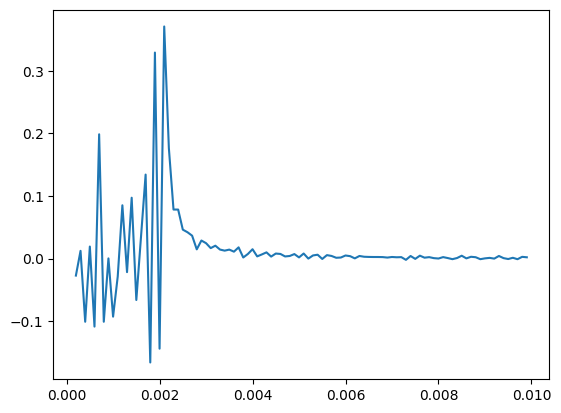

In [147]:
diff = np.convolve(avg_en_temp, [1,-1])[1:-1]
plt.plot(temps[1:], diff)


In [152]:
acceptance

{0.0001: 0.00932,
 0.0002: 0.007846666666666667,
 0.00030000000000000003: 0.008726666666666667,
 0.0004: 0.00469,
 0.0005: 0.006,
 0.0006000000000000001: 0.005236666666666666,
 0.0007000000000000001: 0.01568,
 0.0008: 0.012403333333333334,
 0.0009000000000000001: 0.011763333333333334,
 0.001: 0.008833333333333334,
 0.0011: 0.006103333333333333,
 0.0012000000000000001: 0.019086666666666665,
 0.0013000000000000002: 0.01808,
 0.0014000000000000002: 0.03593333333333333,
 0.0015: 0.028583333333333332,
 0.0016: 0.04007,
 0.0017000000000000001: 0.07452,
 0.0018000000000000002: 0.03977666666666667,
 0.0019000000000000002: 0.13471333333333332,
 0.002: 0.10013,
 0.0021: 0.22585,
 0.0022: 0.30443333333333333,
 0.0023: 0.3443366666666667,
 0.0024: 0.39036,
 0.0025: 0.42037,
 0.0026: 0.45208333333333334,
 0.0027: 0.47838,
 0.0028: 0.49392,
 0.0029: 0.5174366666666667,
 0.003: 0.53953,
 0.0031: 0.5554033333333334,
 0.0032: 0.5723866666666667,
 0.0033: 0.5866933333333333,
 0.0034: 0.5998233333333334,